# Session 4 Recap

*Joachim Kahr Rasmussen*

## Recap (I/III) 

Why (sometimes) use pandas over numpy?
- It is built on numpy:
    - Simplicity: Pandas is built with Python's simplicity 
    - Powerful and fast tools for manipulating data from numpy
- Improves on numpy:
    - Clarity, flexibility by using labels (keys)
    - Introduces lots of new, useful tools for data analysis

Intro do DataFrames and Series:
- DataFrame: A 2d-array (matrix) with labelled columns and rows (which are called indices)
- Series: A vector/list with labels for each entry.

Numeric methods with pandas:
- `value_counts()` counts categorical data
- `describe()` provides summary statistics of data (implicit numeric interpretation)

## Recap (II/III) 


Pandas handles certain datatypes (beyond numeric/boolean data) natively:


- datetime, string, categorical, missings
- extensions (e.g. to spatial data with geopandas)


There are several ways to deal with missings and duplicates:

- missing: ignore, delete, replace (impute), collect new data
- duplicate: check whether they are present, remove or deal with explicitly

There exists certain numeric methods in pandas that are quite useful:
- `describe()` provides summary statistics of data (implicit numeric interpretation)
- `value_counts()` counts categorical data
- Many more methods (see slides)

## Recap (III/III) 

Modifying the dataframe:
- Indices can be
    - changed with `set_index()`
    - sorted with `.sort_index()`
    - reset with `reset_index()`
- The dataframe can be sorted with `sort_values()`
- Columns can be relabeled with either `columns()` or `rename()`

Selection of certain rows and columns:
- `loc()` is used when referring to labels
- `iloc()` is used when referring to indices (numpy type of reference)

Loading and storing data:
- Pandas readers include:  excel, sql, sas, stata and many more.
- We will particularly often read csv-files with `pd.read_csv()`
- Data can be stored with `to_XX()`, where XX is a file format (e.g. `to_csv()`)

## Questions?

<center><img src='https://media.giphy.com/media/l2Sq3owVNfmwPnhy8/source.gif' alt="Drawing" style="width: 400px;"/></center>

# Session 5: Data structuring II

### The Pandas way

Joachim Kahr Rasmussen

## Overview of Session

Today, we will continue working with `pandas` and how to structure your data. This time, we cover:
1. Joining data
2. The "split-apply-combine" framework
3. Reshaping data

## Associated Readings

PDA, chapter 8:

PDA, chapter 10:

PDA, section 5.3:

PDA, sections 6.1-6.2:

Wickham (2011):

## Loading Stuff

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

# Joining DataFrames

## Recap

*Which datatypes beyond numeric/boolean does pandas handle natively?*


- datetime, string, categorical, (missing)
- extensions, e.g. to spatial data with geopandas


*What can we do to missing values and duplicates?*

- missing: ignore, delete, replace (impute), collect new data
- duplicated: check whether they are present, remove, select

For the following, we use the multi column display from Jake van der Plaas, [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html)

In [2]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)


# Joining DataFrames

Until now we've worked with one DataFrame at a time
- with the exception of `concat` in Assignment 0

We will now learn to put them together.

### Some DataFrames
Let's make some data to play with. Here, use `dict` approach:

In [9]:
left = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'value_left': range(4)})    
right = pd.DataFrame({'key': ['C', 'D', 'E', 'F'], 'value_right': range(4,8)})
display('left', 'right')

,key,value_left
0,A,0
1,B,1
2,C,2
3,D,3
,key,value_right
0,C,4
1,D,5
2,E,6
3,F,7


## Merging data
The forthcoming figures all follow this convention:

-  <font color="blue">blue</font>: rows in merge output
-  <font color="red">red</font>: rows excluded from output (i.e., removed)
-  <font color="green">green</font>: missing values replaced with NaNs 

We use `merge` which is pandas function and a method for dataframes.

### Inner merge (default)
This merge only uses only *shared* keys

In [23]:
inner_merge = pd.merge(left, right, on='key', how='inner')
inner_merge

,key,value_left,value_right
0,C,2,4
1,D,3,5


<center><img src='https://i.stack.imgur.com/YvuOa.png' alt="Drawing" style="width: 600px;"/></center>

### Left merge
This merge uses only *left* keys

In [14]:
left_merge = pd.merge(left, right, on='key', how='left')
left_merge

,key,value_left,value_right
0,A,0,NaN
1,B,1,NaN
2,C,2,4.0
3,D,3,5.0


<center><img src='https://i.stack.imgur.com/BECid.png' alt="Drawing" style="width: 600px;"/></center>

## Loading Stuff

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

### Right merge
This merge uses only *right* keys (pretty redundant...)

In [17]:
right_merge = pd.merge(left, right, on='key', how='right')
right_merge

,key,value_left,value_right
0,C,2.0,4
1,D,3.0,5
2,E,NaN,6
3,F,NaN,7


<center><img src='https://i.stack.imgur.com/8w1US.png' alt="Drawing" style="width: 600px;"/></center>

### Outer merge
This merge uses *all* keys

In [18]:
outer_merge = pd.merge(left, right, on='key', how='outer')
outer_merge

,key,value_left,value_right
0,A,0.0,NaN
1,B,1.0,NaN
2,C,2.0,4.0
3,D,3.0,5.0
4,E,NaN,6.0
5,F,NaN,7.0


<center><img src='https://i.stack.imgur.com/euLoe.png' alt="Drawing" style="width: 600px;"/></center>

### Overview of merge types

<center><img src='https://www.dofactory.com/Images/sql/sql-joins.png' alt="Drawing" style="width: 450px;"/></center>

More merge type exists, see [this post](https://stackoverflow.com/questions/53645882/pandas-merging-101) for details.

## Joining DataFrames

We can also join by keys in the index. This is possible with `join` or `concat`:
- both methods work vertically and horizontally.
- `concat` works with  multiple DataFrames at once;

Requirement: overlapping index keys or column names.

In [21]:
df0 = left.set_index('key')
df1 = right.set_index('key')

### Horizontal join 

Works like `merge` where keys is now the index! 

In [26]:
inner_data = df0.join(df1, how='inner')
inner_data

,value_left,value_right
key,,
C,2,4
D,3,5


### Vertical Join, Axis = 1

`concat` on axis=1 acts similar to a outer join.

In [34]:
dfs = [df0, df1]
print(dfs)
print()
print(pd.concat(dfs, axis=1, sort=False))

[     value_left
key            
A             0
B             1
C             2
D             3,      value_right
key             
C              4
D              5
E              6
F              7]

   value_left  value_right
A         0.0          NaN
B         1.0          NaN
C         2.0          4.0
D         3.0          5.0
E         NaN          6.0
F         NaN          7.0


### Vertical Join, Axis = 0

On the other hand, `concat` on axis=0 stacks the dataframes on top of each other!

In [35]:
print(pd.concat([df0, df1], join='outer', axis=0, sort=False))

     value_left  value_right
key                         
A           0.0          NaN
B           1.0          NaN
C           2.0          NaN
D           3.0          NaN
C           NaN          4.0
D           NaN          5.0
E           NaN          6.0
F           NaN          7.0


### Vertical and Horizontal

An overview of `concat`/`join` operations (left: horizontal, right: vertical)

<center><img src='https://i.stack.imgur.com/1rb1R.jpg' alt="Drawing" style="width: 750px;"/></center>

### Example of Using Concat (I/III)

Let's load some stock data...

In [123]:
# In anaconda prompt: "pip install pandas-datareader"

from pandas_datareader import data
import matplotlib.pyplot as plt # For plotting

stocks = ['aapl', 'goog', 'msft', 'amzn', 'fb', 'tsla']

def load_stock(s):
    return data.DataReader(s, data_source='yahoo', start='2000')['Adj Close']

stock_dfs = {s:load_stock(s) for s in stocks} # dictionary of all stock price
stock_df = pd.concat(stock_dfs, axis=1) # horizontal join

### Example of Using Concat (II/III)

What do the data look like?

In [128]:
stock_df.tail(10)

,aapl,goog,msft,amzn,fb,tsla
Date,,,,,,
2021-06-03,123.540001,2404.610107,245.710007,3187.010010,326.040009,572.840027
2021-06-04,125.889999,2451.760010,250.789993,3206.219971,330.350006,599.049988
2021-06-07,125.900002,2466.090088,253.809998,3198.010010,336.579987,605.130005
2021-06-08,126.739998,2482.850098,252.570007,3264.110107,333.679993,603.590027
2021-06-09,127.129997,2491.399902,253.589996,3281.149902,330.250000,598.780029
2021-06-10,126.110001,2521.600098,257.239990,3349.649902,332.459991,610.119995
2021-06-11,127.349998,2513.929932,257.890015,3346.830078,331.260010,609.890015
2021-06-14,130.479996,2527.040039,259.890015,3383.870117,336.769989,617.690002
2021-06-15,129.639999,2520.659912,258.359985,3383.129883,336.750000,599.359985


### Example of Using Concat (III/III)

Now, let's try and visualize it (more about this in next session)!

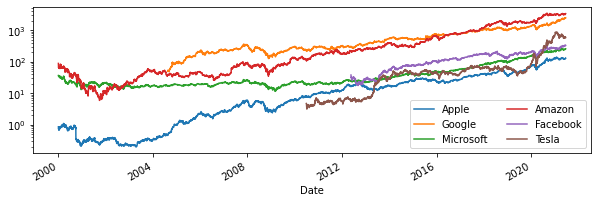

In [129]:
ax = stock_df.plot(logy=True, figsize=(10,3))
ax.legend(["Apple", "Google","Microsoft", "Amazon","Facebook", "Tesla"], loc='best', ncol=2)

# Split-apply-combine 

## A Definition
*What is the split-apply-combine framework?*

A procedure to...
1. **split** a DataFrame into subsets of data,
2. **apply** certain functions (sorting, mean, other custom stuff), and
3. **combine** it back into a DataFrame

Application example: compute mean personal income.

## The Process $-$ an Overview

How do we *split* observations by x and *apply* the calculation mean of y?*

<center><img src='https://raw.githubusercontent.com/abjer/sds2017/master/slides/figures/split-apply-combine.png'></center>

## Split-apply-combine in Pandas

A powerful tool in DataFrames is the `groupby` method. Example:

In [130]:
split_var = 'sex' # like x in figure
apply_var = 'total_bill' # like y in figure

tips.groupby(split_var)[apply_var].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

## What is groupby?
`groupby` creats a collection of sub-dataframes we can process.

We can iterate over a groupby object. Example:

In [137]:
results = {}

for group, group_df in tips.groupby('sex'):
      results[group] = group_df.total_bill.mean() 
    
pd.Series(results)

Male      20.744076
Female    18.056897
dtype: float64

## Other Methods and Functions in groupby

Can other functions be applied?

- Yes: `mean`, `std`, `min`, `max` all work. 
- Using `.apply()` method and inserting your ***homemade*** function works too.

## Additional variables groupby
Does `groupby` work for multiple variables, functions?

In [139]:
split_vars = ['sex', 'time'] 
apply_vars = ['total_bill', 'tip']
apply_fcts = ['median', 'mean', 'std']
combined = tips.groupby(split_vars)[apply_vars].agg(apply_fcts)

print(combined.reset_index() )   

      sex    time total_bill                         tip                    
                      median       mean       std median      mean       std
0    Male   Lunch      16.58  18.048485  7.953435   2.31  2.882121  1.329017
1    Male  Dinner      19.63  21.461452  9.460974   3.00  3.144839  1.529116
2  Female   Lunch      13.42  16.339143  7.500803   2.01  2.582857  1.075108
3  Female  Dinner      17.19  19.213077  8.202085   3.00  3.002115  1.193483


Note grouping with multiple variables uses a [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.MultiIndex.html) which we do not cover.

## Maintaining the Structure
*How do we get our `groupby` output into the original dataframe?*

- Option 1: you use `transform`.

- Option 2: you merge it (not always recommended)



In [174]:
mu_sex = tips.groupby(split_vars)[apply_var].transform('mean').rename('tb_mu')
tips_merge = pd.merge(tips, mu_sex, left_index=True, right_index=True, how='inner')

dev_sex = (tips.total_bill - mu_sex).rename('tb_dev')
tips_merge = pd.merge(tips_merge, dev_sex, left_index=True, right_index=True, how='inner')

print(tips_merge.head(5))

   total_bill   tip     sex smoker  day    time  size      tb_mu     tb_dev
0       16.99  1.01  Female     No  Sun  Dinner     2  19.213077  -2.223077
1       10.34  1.66    Male     No  Sun  Dinner     3  21.461452 -11.121452
2       21.01  3.50    Male     No  Sun  Dinner     3  21.461452  -0.451452
3       23.68  3.31    Male     No  Sun  Dinner     2  21.461452   2.218548
4       24.59  3.61  Female     No  Sun  Dinner     4  19.213077   5.376923


# Reshaping Data

## Stacking Data (I/II)

A DataFrame can be collapsed into a Series with the **stack** command.

Let's generate a simple example:

In [221]:
df = pd.DataFrame([[1,2],[3,4]],columns=['EU','US'],index=[2000,2010])
df

,EU,US
2000,1,2
2010,3,4


Now, stack the data:

In [222]:
stacked = df.stack() # going from wide to long format 
stacked

2000  EU    1
      US    2
2010  EU    3
      US    4
dtype: int64

## Stacking Data (II/II)

Clearly, the data now comes with **hierarchical indexing**; first year, then region.

If we want, we can just reset the indexing:

In [223]:
stacked = stacked.reset_index()
stacked

,level_0,level_1,0
0,2000,EU,1
1,2000,US,2
2,2010,EU,3
3,2010,US,4


And then do the renaming...

In [227]:
stacked.columns = ['year', 'place', 'value']
stacked

,year,place,value
0,2000,EU,1
1,2000,US,2
2,2010,EU,3
3,2010,US,4


## To Wide Format

NoteThe stacked DataFrame is in long/tidy format, the original is wide.

We can easily transform a long DataFrame with `unstack()`

In [229]:
print(stacked)
print()
print(df.stack().unstack(level=1))
print()
print(df.stack().unstack(level=0))

   year place  value
0  2000    EU      1
1  2000    US      2
2  2010    EU      3
3  2010    US      4

      EU  US
2000   1   2
2010   3   4

    2000  2010
EU     1     3
US     2     4


## More Stuff

Other cool functions include
- `melt` which only stacks certain columns
- `pivot` which makes you to reshape the dataframe like in Excel

In [210]:
df_titanic = sns.load_dataset('titanic').loc[:,['survived', 'pclass', 'sex']]
print(df_titanic)
print(df_titanic.melt())
print(df_titanic.pivot(columns='survived'))

     survived  pclass     sex
0           0       3    male
1           1       1  female
2           1       3  female
3           1       1  female
4           0       3    male
..        ...     ...     ...
886         0       2    male
887         1       1  female
888         0       3  female
889         1       1    male
890         0       3    male

[891 rows x 3 columns]
      variable   value
0     survived       0
1     survived       1
2     survived       1
3     survived       1
4     survived       0
...        ...     ...
2668       sex    male
2669       sex  female
2670       sex  female
2671       sex    male
2672       sex    male

[2673 rows x 2 columns]
         pclass          sex        
survived      0    1       0       1
0           3.0  NaN    male     NaN
1           NaN  1.0     NaN  female
2           NaN  3.0     NaN  female
3           NaN  1.0     NaN  female
4           3.0  NaN    male     NaN
..          ...  ...     ...     ...
886         2.0  Na

# Summary

1. [joining datasets](#Joining-data)
    - horizontal (columns or index) and vertical
1. [the split apply combine framework](#Split-apply-combine)
    - useful for computing on subsets of data (e.g. mean by type, date)
1. [reshaping data](#Reshaping-data)
    - going from wide to long and back

## Beyond pandas

If you want more sophisticated data processing tools for big data. 

Single machine
- `multiprocessing` and `joblib` for executing code in parallel (using multiple cores)

Multiple machines (cluster)
- `dask` uses a pandas like syntax, also useful for parallelizing
- `pyspark` is Python based but uses a  (multiple machines)
